# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
#create empty list to append to
city_data = []
i=1
#for loop to go through all cities
for city in cities:
    #try in case city doesn't show up
    try:
        #create url
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
        #get response
        response = requests.get(url).json()
        
        #get info and store as variables
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        hum = response["main"]["humidity"]
        cloud = response["clouds"]["all"]
        wind_sp = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]
        
        #store data in a dict to later create df
        city_data.append({
            "City" : city,
            "Lat": lat,
            "Lng": lng,
            "Max Temp": max_temp,
            "Humidity": hum,
            "Cloudiness": cloud,
            "Wind Speed": wind_sp,
            "Country": country,
            "Date": date
        })
        #print out what we've processed
        print(f"Processed {city} as number {i}")
        
        #increase each by 1
        i+=1
    
    #catch errors
    except:
        print(f"{city} not found")


Processed upernavik as number 1
Processed hermanus as number 2
Processed tasiilaq as number 3
Processed vestmannaeyjar as number 4
Processed yellowknife as number 5
Processed aklavik as number 6
Processed punta arenas as number 7
Processed tuktoyaktuk as number 8
Processed pisco as number 9
Processed mataura as number 10
Processed nizwa as number 11
Processed avarua as number 12
Processed puerto ayora as number 13
Processed lompoc as number 14
Processed rikitea as number 15
Processed busselton as number 16
illoqqortoormiut not found
Processed srivardhan as number 17
Processed ushuaia as number 18
Processed vaini as number 19
Processed cape town as number 20
Processed ribeira grande as number 21
mudyuga not found
Processed arlington as number 22
Processed ruwi as number 23
Processed mar del plata as number 24
Processed hilo as number 25
Processed carnarvon as number 26
Processed areosa as number 27
Processed lebu as number 28
Processed kulhudhuffushi as number 29
Processed dikson as num

Processed campo verde as number 234
marcona not found
Processed ostrovnoy as number 235
Processed slave lake as number 236
Processed eydhafushi as number 237
Processed karibib as number 238
Processed mamlyutka as number 239
Processed dudinka as number 240
Processed chipinge as number 241
Processed the valley as number 242
Processed meulaboh as number 243
Processed tairua as number 244
Processed caravelas as number 245
Processed saint-jean-port-joli as number 246
Processed souillac as number 247
Processed fjerritslev as number 248
Processed shimoda as number 249
Processed rawson as number 250
Processed nome as number 251
Processed mbini as number 252
Processed tzucacab as number 253
kedarnath not found
Processed makuyuni as number 254
Processed luderitz as number 255
Processed mongagua as number 256
Processed gidole as number 257
Processed gondanglegi as number 258
Processed klaksvik as number 259
Processed marataizes as number 260
Processed itacoatiara as number 261
Processed touros as

Processed bayanday as number 469
Processed comodoro rivadavia as number 470
Processed medak as number 471
Processed waipawa as number 472
Processed chekhov as number 473
Processed husavik as number 474
Processed katsuura as number 475
Processed kudahuvadhoo as number 476
Processed deputatskiy as number 477
Processed cayenne as number 478
Processed port augusta as number 479
Processed mufumbwe as number 480
Processed lata as number 481
Processed muli as number 482
Processed aktau as number 483
Processed brownsville as number 484
Processed kigoma as number 485
Processed henties bay as number 486
Processed balfron as number 487
Processed makakilo city as number 488
Processed iskateley as number 489
Processed adrian as number 490
Processed cherskiy as number 491
Processed berlevag as number 492
Processed pangai as number 493
Processed harrisburg as number 494
Processed atyra as number 495
Processed yining as number 496
Processed bandar-e anzali as number 497
Processed road town as number 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create dataframe and display it
city_data_df = pd.DataFrame(city_data)
city_data_df

#export dataframe to csv
city_data_df.to_csv(output_data_file)

In [7]:
#get necessary columns
stats_df = city_data_df[["Lat", "Lng", "Max Temp", "Humidity", 'Cloudiness', 'Wind Speed']]

#perform operations on all above columns
count = stats_df.count()
mean = stats_df.mean()
std = stats_df.std()
minimum = stats_df.min()

#used https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html
lowerq = stats_df.quantile(q = 0.25)
middleq = stats_df.quantile(q = 0.5)
upperq = stats_df.quantile(q = 0.75)
maximum = stats_df.max()

#create dataframe and store info
summary_df = pd.DataFrame({
    "count": count,
    "mean": mean,
    "std": std,
    "min": minimum,
    "25%": lowerq,
    "50%": middleq,
    "75%": upperq,
    "max": maximum
})
#used https://stackoverflow.com/questions/17076705/invert-index-and-columns-in-a-pandas-dataframe
#transpose our column and row names
summary_df = summary_df.T

#display it
summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,570.000000,570.000000,570.00000,570.000000,570.000000,570.000000
mean,18.738048,16.677934,56.95107,71.670175,52.182456,8.667105
std,34.062513,91.556119,25.72967,23.342035,38.856616,6.215417
min,-54.800000,-179.166700,-27.51000,8.000000,0.000000,0.560000
25%,-9.627575,-63.366650,41.00000,58.000000,13.250000,4.235000
50%,20.912850,21.097750,64.40000,78.000000,49.000000,6.910000
75%,47.635900,96.932125,77.29000,90.000000,91.000000,12.067500
max,78.218600,179.316700,102.20000,100.000000,100.000000,39.120000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
clean_data = stats_df[stats_df["Humidity"] <= 100]
clean_data.count()
#same count = no cities over 100

Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

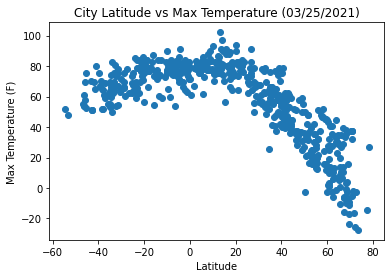

Plot to show the relationship between latitude and max temperature of different cities.


In [18]:
#get info from dataframe
max_temp = city_data_df["Max Temp"]
lat = city_data_df["Lat"]

#create plot
plt.scatter(lat, max_temp)

#create labels and title
plt.title('City Latitude vs Max Temperature (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#export as png
plt.savefig('output_data/max_temp.png')

#show plot and describe what's happening
plt.show()
print("Plot to show the relationship between latitude and max temperature of different cities.")

## Latitude vs. Humidity Plot

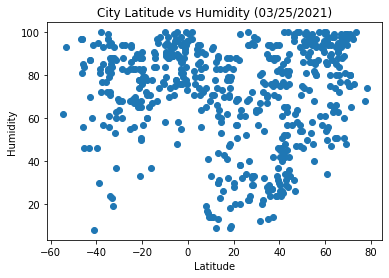

Plot to show the relationship between latitude and humidity of different cities.


In [19]:
#get info from dataframe
hum = city_data_df["Humidity"]

#create plot
plt.scatter(lat, hum)

#set labels and title
plt.title('City Latitude vs Humidity (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#export as png
plt.savefig('output_data/humidity.png')

#show and describe plot
plt.show()
print("Plot to show the relationship between latitude and humidity of different cities.")

## Latitude vs. Cloudiness Plot

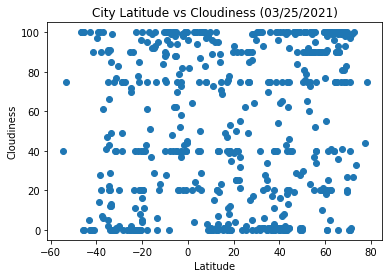

Plot to show the relationship between latitude and cloudiness of different cities.


In [20]:
#get info from dataframe
cloud = city_data_df["Cloudiness"]

#create plot
plt.scatter(lat, cloud)

#set labels and title
plt.title('City Latitude vs Cloudiness (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#export as png
plt.savefig('output_data/cloudiness.png')

#show and describe plot
plt.show()
print("Plot to show the relationship between latitude and cloudiness of different cities.")

## Latitude vs. Wind Speed Plot

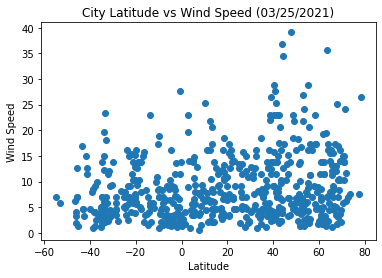

Plot to show the relationship between latitude and wind speed of different cities.


In [21]:
#get info from df
wind_sp = city_data_df["Wind Speed"]

#create plot
plt.scatter(lat, wind_sp)

#set title and labels
plt.title('City Latitude vs Wind Speed (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#export as png
plt.savefig('output_data/wind_speed.png')

#show and describe plot
plt.show()
print("Plot to show the relationship between latitude and wind speed of different cities.")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between the northern hemisphere's latitude and max temperature is -0.88


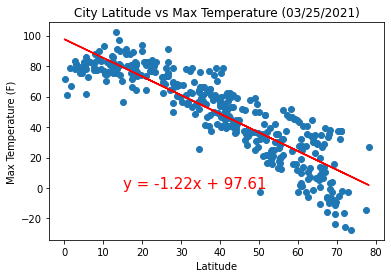

Scatter plot shows strong correlation between max temp increasing the closer we get to the equator. This was expected.


In [11]:
#set up dataframe of northern hemisphere
northern_lat = city_data_df[city_data_df["Lat"] >= 0]

#create variables
nlat = northern_lat["Lat"]
max_temp = northern_lat["Max Temp"]

#create plot and set title and labels
plt.scatter(nlat, max_temp)
plt.title('City Latitude vs Max Temperature (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Calculate the correlation coefficient and linear regression model 
# for northern hemisphere and max temp
correlation = st.pearsonr(nlat, max_temp)
print(f"The correlation between the northern hemisphere's latitude and max temperature is {round(correlation[0],2)}")

#get linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nlat, max_temp)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#add model to plot
plt.plot(nlat, regress_values, "r-")
plt.annotate(line_eq, (15, 0), fontsize=15, color="red")
plt.show()

#analysis
print("Scatter plot shows strong correlation between max temp increasing the closer we get to the equator. This was expected.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between the southern hemisphere's latitude and max temperature is 0.59


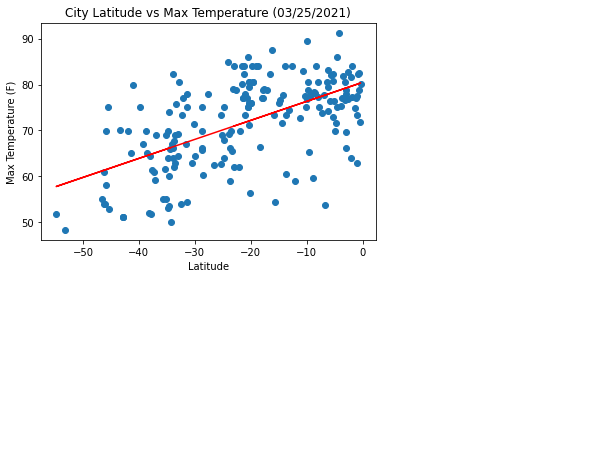

Scatter plot shows strong correlation between max temp increasing the closer we get to the equator. Correlation is not as strong as in northern, this may be because we have fewer data points.


In [9]:
#create dataframe of southern hemisphere
southern_lat = city_data_df[city_data_df["Lat"] < 0]

#create variables
slat = southern_lat["Lat"]
max_temp = southern_lat["Max Temp"]

#create plot and set title and labels
plt.scatter(slat, max_temp)
plt.title('City Latitude vs Max Temperature (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Calculate the correlation coefficient and linear regression model 
# for southern hemisphere and max temp
correlation = st.pearsonr(slat, max_temp)
print(f"The correlation between the southern hemisphere's latitude and max temperature is {round(correlation[0],2)}")

#get linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(slat, max_temp)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#add model to plot
plt.plot(slat, regress_values, "r-")
plt.annotate(line_eq, (15, 0), fontsize=15, color="red")
plt.show()

#analysis
print("Scatter plot shows strong correlation between max temp increasing the closer we get to the equator. Correlation is not as strong as in northern, this may be because we have fewer data points.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between the northern hemisphere's latitude and humidity is 0.3


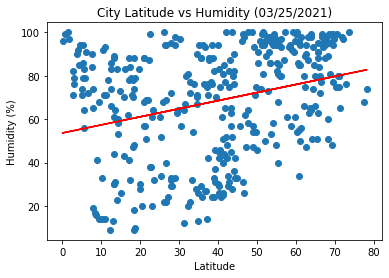

A slight correlation between latitude and humidity. It would be interesting to see if we could find longitudes of cities close to water to see if there's a stronger correlation there.


In [12]:
#create variables
hum = northern_lat["Humidity"]

#create plot and set title and labels
plt.scatter(nlat, hum)
plt.title('City Latitude vs Humidity (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Calculate the correlation coefficient and linear regression model 
# for northern hemisphere and humidity
correlation = st.pearsonr(nlat, hum)
print(f"The correlation between the northern hemisphere's latitude and humidity is {round(correlation[0],2)}")

#get linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nlat, hum)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#add model to plot
plt.plot(nlat, regress_values, "r-")
plt.annotate(line_eq, (15, 0), fontsize=15, color="red")
plt.show()

#analysis
print("A slight correlation between latitude and humidity. It would be interesting to see if we could find longitudes of cities close to water to see if there's a stronger correlation there.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between the southern hemisphere's latitude and humidity is 0.25


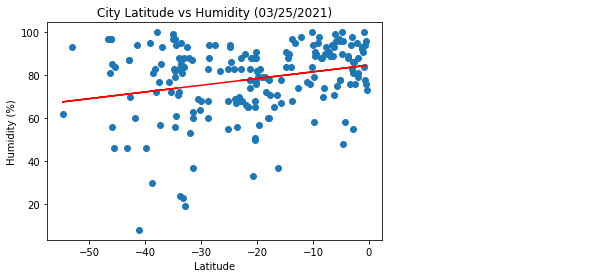

Not as strong of a correlation as in the northern hemisphere. This could be because there are more landlocked countries in the southern hemisphere. There could also just not be much correlation.


In [13]:
#create variables
hum = southern_lat["Humidity"]

#create plot and set title and labels
plt.scatter(slat, hum)
plt.title('City Latitude vs Humidity (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Calculate the correlation coefficient and linear regression model 
# for southern hemisphere and humidity
correlation = st.pearsonr(slat, hum)
print(f"The correlation between the southern hemisphere's latitude and humidity is {round(correlation[0],2)}")

#get linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(slat, hum)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#add model to plot
plt.plot(slat, regress_values, "r-")
plt.annotate(line_eq, (15, 0), fontsize=15, color="red")
plt.show()

#analysis
print("Not as strong of a correlation as in the northern hemisphere. This could be because there are more landlocked countries in the southern hemisphere. There could also just not be much correlation.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between the northern hemisphere's latitude and cloudiness is 0.2


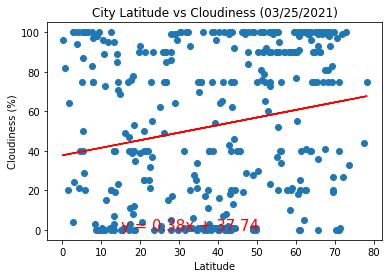

We see almost no correlation between cloudiness and latitude


In [14]:
#create variables
cloud = northern_lat["Cloudiness"]

#create plot and set title and labels
plt.scatter(nlat, cloud)
plt.title('City Latitude vs Cloudiness (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Calculate the correlation coefficient and linear regression model 
# for northern hemisphere and cloudiness
correlation = st.pearsonr(nlat, cloud)
print(f"The correlation between the northern hemisphere's latitude and cloudiness is {round(correlation[0],2)}")

#get linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nlat, cloud)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#add model to plot
plt.plot(nlat, regress_values, "r-")
plt.annotate(line_eq, (15, 0), fontsize=15, color="red")
plt.show()

#analysis
print("We see almost no correlation between cloudiness and latitude")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between the southern hemisphere's latitude and cloudiness is 0.22


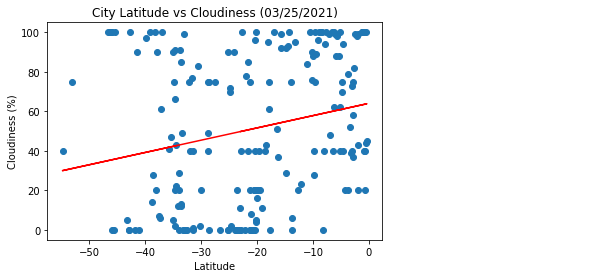

We see almost no correlation between cloudiness and latitude


In [15]:
#create variables
cloud = southern_lat["Cloudiness"]

#create plot and set title and labels
plt.scatter(slat, cloud)
plt.title('City Latitude vs Cloudiness (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Calculate the correlation coefficient and linear regression model 
# for southern hemisphere and cloudiness
correlation = st.pearsonr(slat, cloud)
print(f"The correlation between the southern hemisphere's latitude and cloudiness is {round(correlation[0],2)}")

#get linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(slat, cloud)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#add model to plot
plt.plot(slat, regress_values, "r-")
plt.annotate(line_eq, (15, 0), fontsize=15, color="red")
plt.show()

#analysis
print("We see almost no correlation between cloudiness and latitude")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between the northern hemisphere's latitude and wind speed is 0.12


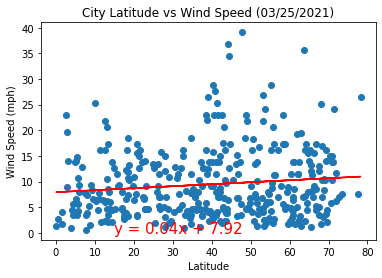

We see almost no correlation between wind speed and latitude


In [16]:
#create variables
wind_sp = northern_lat["Wind Speed"]

#create plot and set title and labels
plt.scatter(nlat,wind_sp)
plt.title('City Latitude vs Wind Speed (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Calculate the correlation coefficient and linear regression model 
# for northern hemisphere and wind speed
correlation = st.pearsonr(nlat, wind_sp)
print(f"The correlation between the northern hemisphere's latitude and wind speed is {round(correlation[0],2)}")

#get linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nlat, wind_sp)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#add model to plot
plt.plot(nlat, regress_values, "r-")
plt.annotate(line_eq, (15, 0), fontsize=15, color="red")
plt.show()

#analysis
print("We see almost no correlation between wind speed and latitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between the southern hemisphere's latitude and wind speed is -0.02


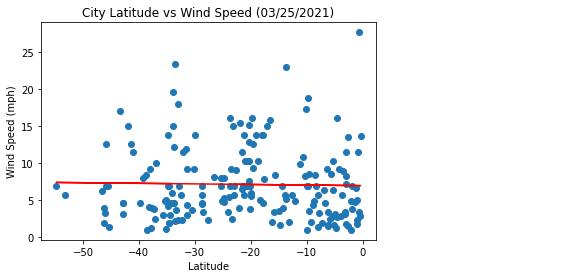

We see almost no correlation between wind speed and latitude


In [17]:
#create variables
wind_sp = southern_lat["Wind Speed"]

#create plot and set title and labels
plt.scatter(slat, wind_sp)
plt.title('City Latitude vs Wind Speed (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Calculate the correlation coefficient and linear regression model 
# for southern hemisphere and wind speed
correlation = st.pearsonr(slat, wind_sp)
print(f"The correlation between the southern hemisphere's latitude and wind speed is {round(correlation[0],2)}")

#get linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(slat, wind_sp)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#add model to plot
plt.plot(slat, regress_values, "r-")
plt.annotate(line_eq, (15, 0), fontsize=15, color="red")
plt.show()

#analysis
print("We see almost no correlation between wind speed and latitude")